#HW5 N-step TD method


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rd

### Enviroment
1. Episode task, $\gamma$ =1, $\alpha$=0.1, $\epsilon$=0.3
2. r=-100 if moves into the swamps; all other transitions yield r=-1
3. Use 30 simulation runs to estimate the average value 
4. Environment size is 10x5 

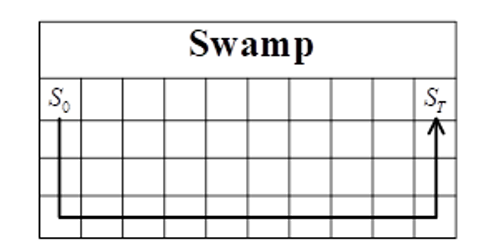

1-step sarsa $$S_0\rightarrow A_0 \rightarrow R_0,S_1$$
3-step sarsa $$S_0\rightarrow A_0 \rightarrow R_0,S_1\rightarrow A_1 \rightarrow R_1,S_2\rightarrow A_2 \rightarrow R_2,S_3$$
$$S_{T-3}\rightarrow A_{T-3} \rightarrow R_{T-3},S_{T-2}\rightarrow A_{T-2} \rightarrow R_{T-2},S_{T-1}\rightarrow A_{T-1} \rightarrow R_{T-1},S_T$$


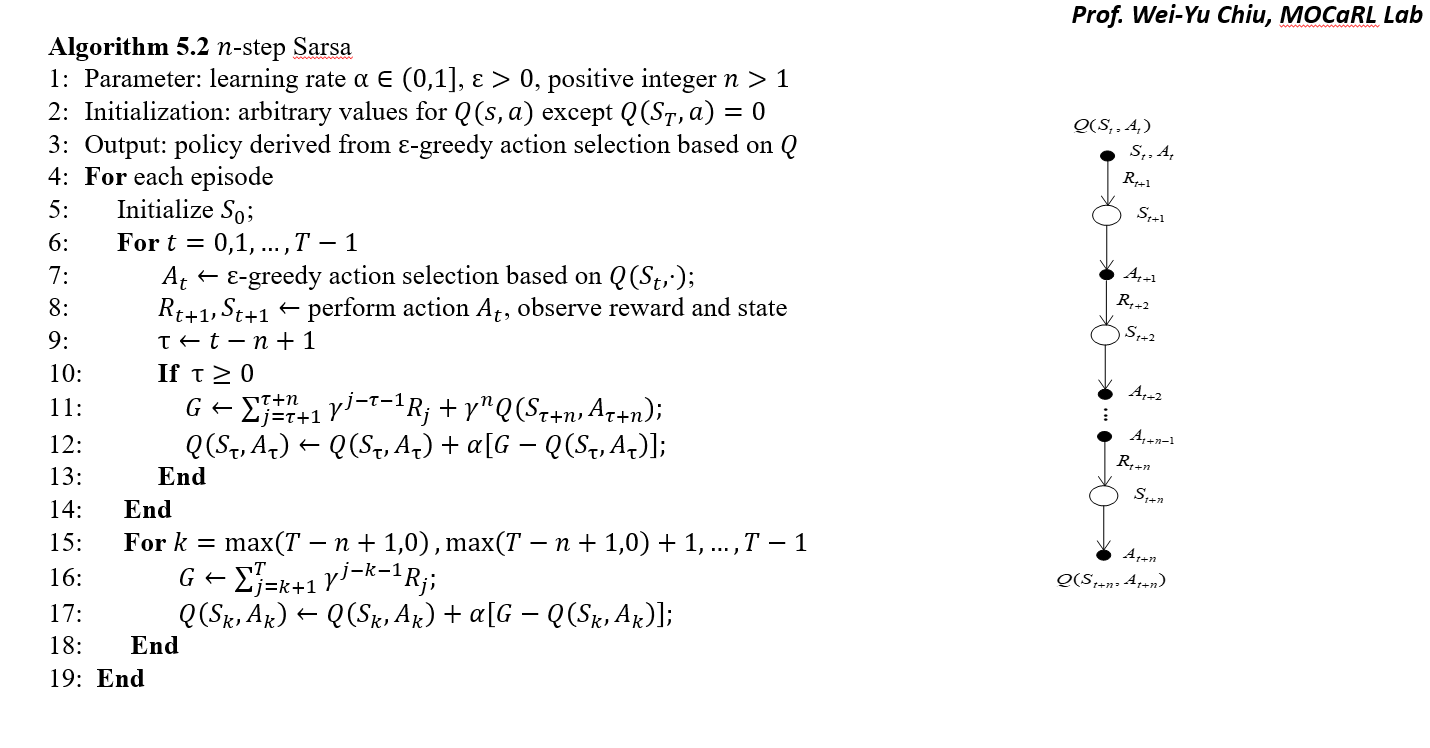

In [2]:
def drawTable(data):
  fig = plt.figure()
  ax = plt.Axes(fig, [0., 0., 1., 1.])
  ax.set_axis_off()
  fig.add_axes(ax)
  plt.gca().invert_yaxis()
  for i in range(10):
    for j in range(5):
      plt.plot((i,i),(j,j+1),'-k')
      plt.plot((i,i+1),(j,j+1),'-k')
      plt.plot((i,i+1),(j,j),'-k')
      plt.plot((i+1,i),(j,j+1),'-k')
      plt.plot((i+1,i+1),(j,j+1),'-k')
      plt.plot((i,i+1),(j+1,j+1),'-k')
      temp = max(data[i][4-j])
      if data[i][4-j][0]==temp:
        plt.gca().add_patch(plt.Polygon([[i+0.5,j+0.5], [i,j], [i,j+1]], color='yellow'))
      if data[i][4-j][1]==temp:
        plt.gca().add_patch(plt.Polygon([[i+0.5,j+0.5], [i,j], [i+1,j]], color='yellow'))
      if data[i][4-j][2]==temp:
        plt.gca().add_patch(plt.Polygon([[i+0.5,j+0.5], [i+1,j], [i+1,j+1]], color='yellow'))
      if data[i][4-j][3]==temp:
        plt.gca().add_patch(plt.Polygon([[i+0.5,j+0.5], [i,j+1], [i+1,j+1]], color='yellow'))

      plt.text(i+0.2,j+0.5,'%.2f' %data[i][4-j][0], verticalalignment='center', horizontalalignment='center')
      plt.text(i+0.5,j+0.2,'%.2f' %data[i][4-j][1], verticalalignment='center', horizontalalignment='center')
      plt.text(i+0.8,j+0.5,'%.2f' %data[i][4-j][2], verticalalignment='center', horizontalalignment='center')
      plt.text(i+0.5,j+0.8,'%.2f' %data[i][4-j][3], verticalalignment='center', horizontalalignment='center')

In [3]:
# left, up, right, down
ACTIONS = [np.array([-1, 0]),
           np.array([0, 1]),
           np.array([1, 0]),
           np.array([0, -1])]

In [4]:
def step(state, action):
  next_state = (state + action).tolist()
  if next_state[0] < 0 or next_state[0] >= 10  or next_state[1] < 0 or next_state[1] >= 5:
    next_state = state
  if next_state[1] == 4:
    reward = -100
  else:
    reward = -1

  return next_state, reward

In [5]:
def sarsa5(n):
  
  returns = []
  
      
######## YOUR CODE HERE ########
  returns = []
  q_value = rd.random([10,5,4])
  q_value[9][3] = 0 #終點(St)
  epsilon = 0.3
  discount = 1
  alpha = 0.1
  St = [9,3]
  S0 = [0,3]
  episode = 2000
  for ep in range(episode):
    t = 0
    state_action = []
    total_reward = 0
    state = S0
    if rd.rand() < epsilon:
        action = rd.randint(0,4)
    else:
        action = np.argmax(q_value[state[0]][state[1]])
    while state != St:
      next_state, reward = step(state,ACTIONS[action])
      if rd.rand() < epsilon:
        next_action = rd.randint(0,4)
      else:
        next_action = np.argmax(q_value[next_state[0]][next_state[1]])
      total_reward += reward
      state_action.append([state, reward, action])
      tau = t - n + 1
      if tau >= 0:
        j = tau + 1
        G = 0
        for number in range(j,tau + n):
          G += discount ** (number - tau - 1) * state_action[number - 1][1]
        G += discount ** n * q_value[next_state[0]][next_state[1]][next_action]
        q_value[state_action[tau][0][0]][state_action[tau][0][1]][state_action[tau][2]] = q_value[state_action[tau][0][0]][state_action[tau][0][1]][state_action[tau][2]] + alpha *(G - q_value[state_action[tau][0][0]][state_action[tau][0][1]][state_action[tau][2]])
      state = next_state
      action = next_action
      t += 1
    T = t + 1
    
    for k in range(T - n + 1,T - 1):
      G = 0
      if k < 0:
        k = 0
      for j in range(k + 1,T):
        G += discount ** (k + 1) * state_action[k][1]

      q_value[state_action[k][0][0]][state_action[k][0][1]][state_action[k][2]] = q_value[state_action[k][0][0]][state_action[k][0][1]][state_action[k][2]] + alpha * (G - q_value[state_action[k][0][0]][state_action[k][0][1]][state_action[k][2]])
    returns.append(total_reward)



####################################
    
  return returns, q_value

In [8]:
def sarsa():
 
  returns = []
  q_value = rd.random([10,5,4])
  q_value[9][3] = 0 #終點(St)
  epsilon = 0.3
  discount = 1
  alpha = 0.1
  St = [9,3]
  episode = 2000
  
######## YOUR CODE HERE ########
  
  for ep in range(episode):
    total_reward = 0
    state = [0,3]
    action = -1
    if rd.random() < epsilon:
      action = rd.randint(0,4)
    else:
      action = np.argmax(q_value[state[0]][state[1]])
    while state != St:
      next_state, reward = step(state,ACTIONS[action])
      next_action = -1
      if rd.random() < epsilon:
        next_action = rd.randint(0,4)
      else:
        next_action = np.argmax(q_value[next_state[0]][next_state[1]])
      q_value[state[0]][state[1]][action] += alpha * (reward + discount * q_value[next_state[0]][next_state[1]][next_action] - q_value[state[0]][state[1]][action])
      state = next_state
      action = next_action
      total_reward += reward
    returns.append(total_reward)
    
####################################
  return returns, q_value

# Result(60%):

Average 30 simulation, 1000 episode per simulation.

In [6]:
def averages(a):
  return np.array([np.average(a[:i+1]) for i in range(len(a))])

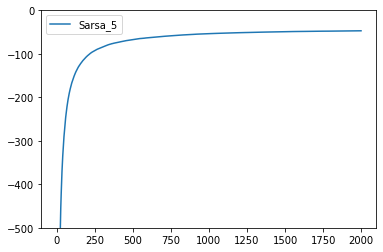

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

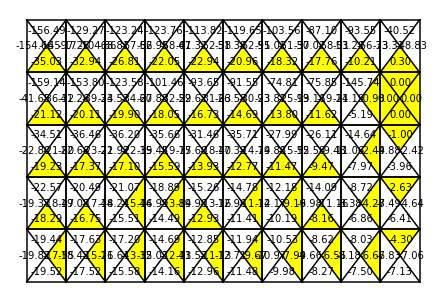

In [7]:
total_reward_sarsa5 = []
q_value_total = np.zeros([10,5,4])
for simulate in range(30):
  reward, q_value = sarsa5(5)
  total_reward_sarsa5.append(averages(reward))
  q_value = np.array(q_value)
  q_value_total += q_value
q_value_total /= 30
plt.plot(np.average(total_reward_sarsa5,axis = 0),label='Sarsa_5')
plt.ylim(-500, 0)
plt.legend()
plt.show()
drawTable(q_value_total)
from google.colab import files #google.colab only
plt.savefig("Sarsa_5.png")
files.download("Sarsa_5.png") #google.colab only

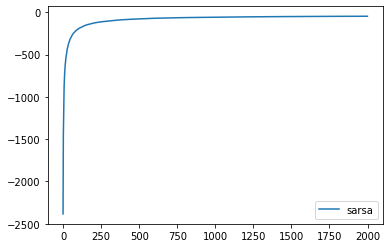

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

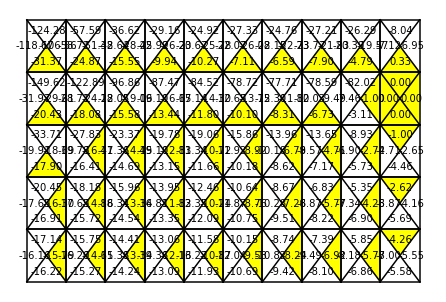

In [10]:
reward_total_sarsa = []
q_value_total_sarsa = np.zeros([10,5,4])
for simulate in range(30):
  reward_sarsa,q_value_sarsa = sarsa()
  reward_total_sarsa.append(averages(reward_sarsa))
  q_value_total_sarsa += q_value_sarsa

q_value_total_sarsa /= 30
plt.plot(np.average(reward_total_sarsa,axis = 0),label = "sarsa")
plt.legend()
plt.show()
drawTable(q_value_total_sarsa)
from google.colab import files #google.colab only
plt.savefig("Sarsa.png")
files.download("Sarsa.png") #google.colab only

#Experiments and Analysis(40%)

1. Plot the Q-values of Sarsa and 5-steps Sarsa, and explain your result.(15%)
2. Plot the average returns of Sarsa and 5-steps Sarsa, and explain your result(15%)
3. Varying n-steps and get average returns, then compare by overlap the plot(10%) 



# **2.**

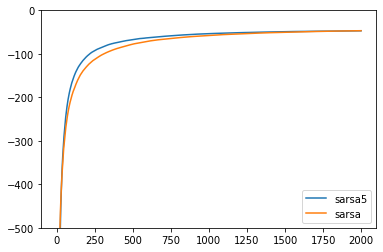

In [11]:
plt.plot(np.average(total_reward_sarsa5,axis = 0),label='Sarsa_5')
plt.plot(np.average(reward_total_sarsa,axis = 0),label = "Sarsa")
plt.ylim(-500, 0)
plt.legend()
plt.show()

# **3.**

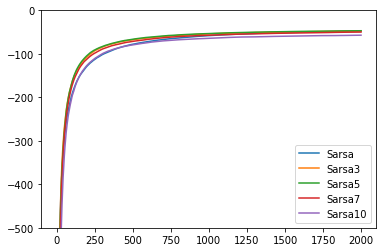

In [12]:
reward_sarsa0 = []
reward_sarsa3 = []
reward_sarsa5 = []
reward_sarsa7 = []
reward_sarsa10 = []
for simulate in range(30):
  reward_0,q_value_0 = sarsa()
  reward_3,q_value_3 = sarsa5(3)
  reward_5,q_value_5 = sarsa5(5)
  reward_7,q_value_7 = sarsa5(7)
  reward_10,q_value_10 = sarsa5(10)
  reward_sarsa0.append(averages(reward_0))
  reward_sarsa3.append(averages(reward_3))
  reward_sarsa5.append(averages(reward_5))
  reward_sarsa7.append(averages(reward_7))
  reward_sarsa10.append(averages(reward_10))

plt.plot(np.average(reward_sarsa0,axis = 0),label = "Sarsa")
plt.plot(np.average(reward_sarsa3,axis = 0),label = "Sarsa3")
plt.plot(np.average(reward_sarsa5,axis = 0),label = "Sarsa5")
plt.plot(np.average(reward_sarsa7,axis = 0),label = "Sarsa7")
plt.plot(np.average(reward_sarsa10,axis = 0),label = "Sarsa10")
plt.ylim(-500, 0)
plt.legend()
plt.show()

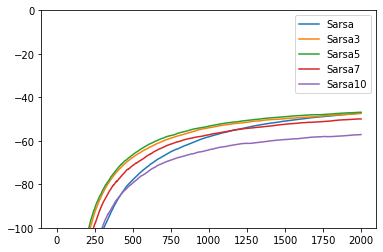

In [13]:
plt.plot(np.average(reward_sarsa0,axis = 0),label = "Sarsa")
plt.plot(np.average(reward_sarsa3,axis = 0),label = "Sarsa3")
plt.plot(np.average(reward_sarsa5,axis = 0),label = "Sarsa5")
plt.plot(np.average(reward_sarsa7,axis = 0),label = "Sarsa7")
plt.plot(np.average(reward_sarsa10,axis = 0),label = "Sarsa10")
plt.ylim(-100, 0)
plt.legend()
plt.show()